# Inhaltsübersicht EDA

### 0. Datensatz laden und bereinigen mit data_preparation.py (neu machen, wenn Funktion abgeschlossen)
- kurze Beschreibung der Daten (Ursprung, Umfang)
- Funktion data_import()
- Funktion data_cleaning()

### 1. Überblick über den Datensatz
- Spaltenbeschreibung/Datentypen: Funktion overview()
- Fehlende Werte (NaN-Anteile)
- Entfernen von Variablen mit mehr als 50% fehlenden Werten

### 2. Deskriptive Statistik & Ausreißer-Handling Schadstoffe (einzeln)
- describe()-Tabelle für Schadstoffe
- Stripplots zur Ausreißererkennung für alle Schadstoffe
- Vergleich von Mean und Median und Schiefe (skew)
- Zellenweise Ersetzung durch NaN (statt Zeilenlöschung)
- Dokumentaton der Schwellenwerte und Filterlogik
- Tabelle mit Anzahl der entfernten Werte

### 3. Deskriptive Statistik & Ausreißer-Handling Wetter (Schleife)
- describe()-Tabelle für Wetter
- Stripplots und Kennzahlen zur Ausreißererkennung für alle Wettervariablen
- Festlegen der Schwellenwerte für Ausreißer, Ersetzen durch NaN
- Dokumentaton der Schwellenwerte und Filterlogik
- Tabelle mit Anzahl der entfernten Werte

### 4. Korrelationsanalyse
- Korrelationsmatrix (Pearson)
- Identifikation und Dokumentation der stärksten Korrelationen
- Empfehlung zur Variablenselektion (evtl. PCA)

### 4. Vorbereitung für Clustering und andere Modellierungen
- Welche Features sollen verwendet werden?
- Standardisierung / Skalierung wie?
- Ziel der Clusteranalyse formulieren


# 0. Datensatz laden

Der Datensatz enthält Messungen zur Luftqualität sowie Wetter- und Bevölkerungdaten aus den Jahren 2014-2024, aggregiert aus verschiedenen Quellen mit einem anfänglichen Gesamtumfang von ca. 14 Mio Datenpunkten (s. README.md --> Datenquellen)
Um alle Daten in einem Pandas-Dataframe bearbeiten zu können, werden zunächst die Datensätze mit der Funktion data_import() aggregiert und anschlie0end mit der Funktion data_cleaning() so bereinigt, dass z.B. redundante Spalten entfernt werden. Die Funktionen und ihre Unterfunktionen finden befinden sich im Skript data_preparation.py.

In [3]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [4]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
df = pd.read_csv("./data/cleaned_data.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,"269,997.00",0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,"124,579.00",0.10,25.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,"193,814.00",0.10,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,"146,631.00",0.10,21.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,NaN,0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Zelle löschen, wenn cleaning-Funktion das übernimmt!

df.columns

# Some redundant columns still need to be removed from df manually: Temperature, Pressure, Wind-speed

Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Population', 'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'Pressure', 'So2',
       'Temperature', 'Wind-gust', 'Wind-speed', 'Dew', 'Humidity', 'Tavg',
       'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd', 'Pres'],
      dtype='object')

In [7]:
# Zelle löschen, wenn cleaning-Funktion das übernimmt!
# Drop redundant columns

df = df.drop(columns=['Temperature', 'Wind-speed', 'Pressure'])
df.columns

Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Population', 'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2', 'Wind-gust',
       'Dew', 'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd',
       'Pres'],
      dtype='object')

# 1. Überblick über den Datensatz

- Überblicksfunktion .overview()
- Fehlende Werte ausloten und Spalten mit < 50% Daten entfernen.
- Nach dem kompletten Entfernen aller Spalten mit < 50% Daten umfasst der Datensatz **1.695.041 Zeilen und 22 Spalten**.

In [8]:
# Function to create overview for dtypes, missing values, unique values

def overview(df):
    '''
    Erstelle einen Überblick über einige Eigenschaften der Spalten eines DataFrames.
    VARs
        df: Der zu betrachtende DataFrame
    RETURNS:
        None
    '''
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing': df.isna().sum(),
                          'missing%': df.isna().mean()*100,
                          'n_uniques': df.nunique(),
                          'uniques%': df.nunique()/df.shape[0]*100,
                          'uniques': [df[col].unique() for col in df.columns]
                         }))


In [9]:
overview(df)

,dtype,total,missing,missing%,n_uniques,uniques%,uniques
Year,int64,1695041,0,0.00,12,0.00,"[2014, 2015, 2016, 2017, 2018, 2019, 2020, 202..."
Month,int64,1695041,0,0.00,12,0.00,"[12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
Day,int64,1695041,0,0.00,31,0.00,"[29, 30, 31, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11..."
Country,object,1695041,0,0.00,95,0.01,"[AT, AU, BE, BO, BR, CA, CH, CL, CN, CO, CY, C..."
City,object,1695041,0,0.00,616,0.04,"[Graz, Innsbruck, Linz, Salzburg, Vienna, Bris..."
Latitude,float64,1692212,2829,0.17,617,0.04,"[47.06667, 47.26266, 48.30639, 47.79941, 48.20..."
Longitude,float64,1692212,2829,0.17,616,0.04,"[15.45, 11.39454, 14.28611, 13.04399, 16.37208..."
Population,float64,363474,1331567,78.56,1289,0.08,"[269997.0, 124579.0, 193814.0, 146631.0, nan, ..."
Co,float64,1063231,631810,37.27,1009,0.06,"[0.1, 1.9, 2.1, nan, 2.3, 2.0, 3.4, 5.5, 3.8, ..."
No2,float64,1408781,286260,16.89,1291,0.08,"[9.0, 25.6, 14.2, 21.1, 4.6, 0.7, nan, 6.5, 4...."


In [10]:
# Sort missing values (descending)

missing_percent = df.isna().mean() * 100
missing_percent_sorted = missing_percent.sort_values(ascending=False)

print(missing_percent_sorted)


Population   78.56
Wind-gust    54.21
Dew          40.99
Prcp         38.73
Co           37.27
So2          31.44
Wdir         31.00
Pres         29.03
Wspd         26.90
Humidity     22.90
O3           22.07
Pm10         20.17
Tmax         18.93
Tmin         18.79
Tavg         17.35
No2          16.89
Pm25         15.50
Longitude     0.17
Latitude      0.17
Month         0.00
City          0.00
Country       0.00
Day           0.00
Year          0.00
dtype: float64


In [11]:
# Remove all columns with more than 50% missing values
# Note: This removes population data entirely!

# Anzahl der Spalten vor dem Entfernen merken
original_columns = df.shape[1]

df = df.loc[:, missing_percent <= 50]

# Print what has changed
print(f"Anzahl der entfernten Spalten: {original_columns - df.shape[1]}")
removed = missing_percent[missing_percent > 50].index
print("Entfernte Spalten:", list(removed))
print("Übrige Spalten:", df.columns)

df.head()

Anzahl der entfernten Spalten: 2
Entfernte Spalten: ['Population', 'Wind-gust']
Übrige Spalten: Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'So2', 'Dew', 'Humidity', 'Tavg',
       'Tmin', 'Tmax', 'Prcp', 'Wdir', 'Wspd', 'Pres'],
      dtype='object')


,Year,Month,Day,Country,City,Latitude,Longitude,Co,No2,O3,...,So2,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,0.10,9.00,NaN,...,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,0.10,25.60,NaN,...,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,0.10,14.20,NaN,...,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,0.10,21.10,NaN,...,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,0.10,9.00,NaN,...,2.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(1695041, 22)

# Deskriptive Statistik

Es werden alle Variablen zu Schadstoffen und Wetterbedingungen nacheinander betrachtet und ggf. um Ausreißer bereiningt.
Die Visualisierung der Verteilung/Varianz erfolgt durch Stripplots. Diese eignen sich besonders gut, um Platzhalterwerte und Unregermäßigkeiten in der Verteilung augenfällig zu machen.
Entscheidungen zum Cutoff für Ausreißer werden auf der Grundlage von Weltwissen, kombiniert mit folgenden Kennzahlen getroffen:
- Mean
- Median
- Schiefe
- Min
- Max

Die Entscheidungen sind also nicht rein statistisch begründet.
Ziel der Ausreißerentfernung ist es, sachlich unmögliche Werte zu entfernen, die natürliche Varianz zu erhalten und einen repräsentativen Datensatz für folgende Modellierungen zu schaffen.

Methode zur Ausreißerentfernung: Zur Datenbereinigung wurden extreme Ausreißer in den Schadstoffwerten nicht durch das Entfernen ganzer Zeilen, sondern durch das gezielte Ersetzen der jeweiligen Zellen mit NaN behandelt. So bleiben andere valide Messwerte in der gleichen Zeile erhalten.

Zum Vorgehen: Zunächst werden die Schadstoffe einer nach dem anderen betrachtet. Im Anschluss werden alle Wettervariablen in einer gemeinsamen Schleife visualisiert, die Ausreißer entfernt und die Ergebnisse diskutiert und dokumentiert.

# Analyse der Schadstoffdaten

In [13]:
# Pollutants

pollutant_cols = ["Co", "Pm25", "Pm10", "So2", "No2", "O3"]
df[pollutant_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Co,"1,063,231.00",4.77,8.89,0.00,1.40,3.40,5.60,500.00
Pm25,"1,432,252.00",53.25,41.04,0.00,25.00,42.00,67.00,999.00
Pm10,"1,353,189.00",27.07,27.69,0.00,12.00,19.00,34.00,999.00
So2,"1,162,066.00",3.98,8.82,0.00,1.20,2.50,4.30,500.00
No2,"1,408,781.00",9.76,10.50,0.00,4.60,7.50,12.40,500.00
O3,"1,320,893.00",20.46,15.39,0.00,11.80,19.90,27.20,500.00


Die Messwerte, die als Maxima angegeben sind (Co = 500 oder Pm25 = 999) lassen Platzhalter für fehlende oder ungültige Daten vermuten. Solche Werte können die Verteilung erheblich verzerren und sollten im Folgenden genau in Augenschein genommen werden.

Damit die Anzahl der entfernten Ausreißer ermittelt werden kann, muss vor der Aureißerentfernung deren Anzahl ermittelt und gespeichert werden:

In [14]:
# Vor der Bereinigung: fehlende Werte zählen
missing_before = df.isna().sum()

# Gesamtgröße des df speichern, um später den Prozentsatz an durch Ausreißerentfernung verlorenen Werten zu berechnen
total_values_before = df.shape[0] * df.shape[1]

## Mittelgroße Feinstaubpartikel (Pm25)

"Die als Feinstaub (PM2,5) bezeichnete Staubfraktion enthält 50% der Teilchen mit einem Durchmesser von 2,5 µm, einen höheren Anteil kleinerer Teilchen und einen niedrigeren Anteil größerer Teilchen." (https://www.umweltbundesamt.at/umweltthemen/luft/luftschadstoffe/staub/pm25)


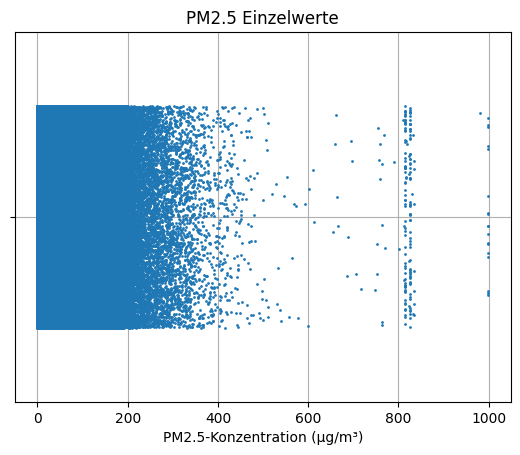

In [15]:
sns.stripplot(x=df["Pm25"], size=2, jitter=0.3)
plt.title("PM2.5 Einzelwerte")
plt.xlabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True);

Bei der visuellen Analyse der PM2.5-Messwerte fällt eine ungewöhnliche Häufung im Bereich zwischen 816 und 834 µg/m³ auf, begleitet von vereinzelten extrem hohen Werten bei 981 und 999 µg/m³. Diese Werte liegen deutlich außerhalb des realistischen Messbereichs und deuten auf Messfehler, Platzhalterwerte oder systembedingte Übertragungsfehler hin. Um die Analyse nicht zu verzerren, werden daher alle PM2.5-Werte ab 816 µg/m³ ausgeschlossen.

In [16]:
# PM2.5 >= 816
df.loc[df["Pm25"] >= 816, "Pm25"] = np.nan

<Axes: xlabel='Pm25', ylabel='Count'>

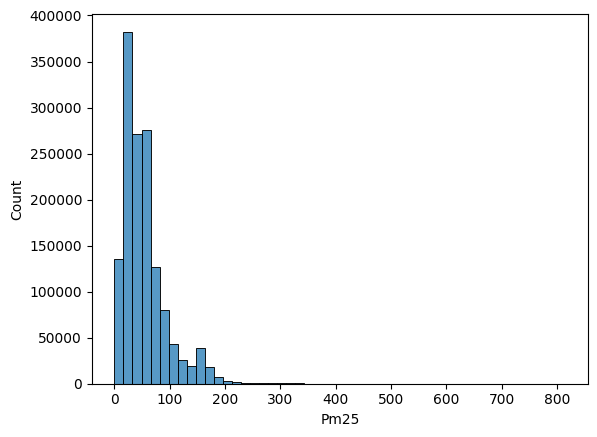

In [17]:
sns.histplot(df["Pm25"], bins=50)

In [18]:
mean_pm25 = df["Pm25"].mean()
median_pm25 = df["Pm25"].median()
skew_pm25 = skew(df["Pm25"].dropna())

print(f"Mittelwert (mean): {mean_pm25:.2f}")
print(f"Median:            {median_pm25:.2f}")
print(f"Schiefe (Skewness): {skew_pm25:.2f}")

Mittelwert (mean): 53.19
Median:            42.00
Schiefe (Skewness): 2.26


### Verteilung der bereinigten PM2.5-Werte

Die PM2.5-Werte zeigen eine deutlich rechtsschiefe Verteilung. Der Mittelwert liegt bei 53,19 µg/m³, während der Median nur 42,00 µg/m³ beträgt. Zusätzlich ergibt die Berechnung der Schiefe (Skewness) einen Wert von 2,26, was auf eine starke Asymmetrie hindeutet.
Diese rechtsschiefe Verteilung bedeutet, dass der Großteil der Messwerte im unteren Bereich liegt, während einige wenige sehr hohe Werte den Mittelwert nach oben ziehen.

Um die Analyse nicht durch technisch bedingte Ausreißer zu verzerren, wurden alle PM2.5-Werte ab 816 µg/m³ ausgeschlossen, da sie deutlich außerhalb des natürlichen Messbereichs liegen und teilweise systematisch auftraten (Platzhalterwerte).

## Kohlenmonoxid (CO)

"Kohlenmonoxid (CO) ist ein farb-, geruch- und geschmackloses Gas, das bei der unvollständigen Verbrennung von Brenn- und Treibstoffen entsteht. Es bildet sich, wenn bei Verbrennungsprozessen zu wenig Sauerstoff zur Verfügung steht. In höheren Konzentrationen wirkt CO als starkes Atemgift." (https://www.umweltbundesamt.de/themen/luft/luftschadstoffe-im-ueberblick/kohlenmonoxid)

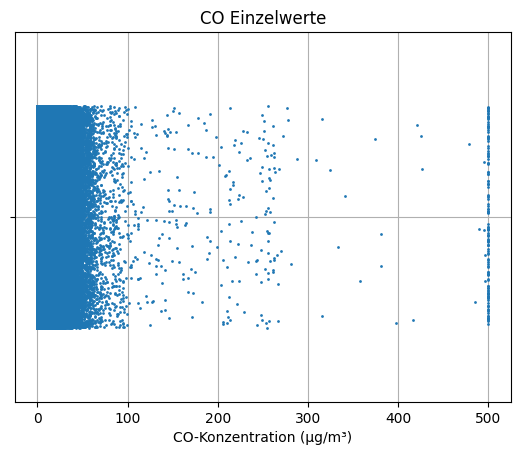

In [19]:
sns.stripplot(x=df["Co"], size=2, jitter=0.3)
plt.title("CO Einzelwerte")
plt.xlabel("CO-Konzentration (µg/m³)")
plt.grid(True);

In [20]:
mean_co = df["Co"].mean()
median_co = df["Co"].median()
skew_co = skew(df["Co"].dropna())

print(f"Mittelwert (mean): {mean_co:.2f}")
print(f"Median:            {median_co:.2f}")
print(f"Schiefe:           {skew_co:.2f}")

Mittelwert (mean): 4.77
Median:            3.40
Schiefe:           27.96


In [21]:
# CO > 300 oder CO == 500 → als NaN
df.loc[df["Co"] >= 300, "Co"] = np.nan

### Verteilung der bereinigten CO-Werte

Die Verteilung der CO-Messwerte ist stark rechtsschief, mit einem Mittelwert von 4.74 µg/m³, einem Median von 3.40 µg/m³ und einer Schiefe von 29.64. Dies deutet auf extreme Ausreißer hin, die den Mittelwert erheblich verzerren. Zusätzlich tritt eine auffällige Häufung exakt bei 500 µg/m³ auf, was sehr wahrscheinlich ein technischer Platzhalterwert ist.

Um die Aussagekraft der Analyse zu erhöhen, wurden daher alle Werte ab 300 µg/m³ ausgeschlossen. Dieser Grenzwert liegt deutlich oberhalb der Hauptverteilung und entfernt technische Ausreißer, aber auch extreme realistische Einzelwerte.

## Stickstoffdioxid (No2)

"Stickstoffdioxid (NO2) ist ein ätzendes Reizgas, es schädigt unmittelbar das Schleimhautgewebe im gesamten Atemtrakt und kann auch die Augen reizen. Stickstoffdioxid zeigt eine stärkere schädliche Wirkung als Stickstoffmonoxid (NO), weshalb Stickstoffdioxid im Zentrum der Bemühungen um saubere Luft steht. [...] Die mittelbare Wirkung des Stickstoffdioxids auf die menschliche Gesundheit besteht in seiner Eigenschaft als Vorläufersubstanz für die Bildung von Feinstaub." (https://www.umweltbundesamt.de/service/uba-fragen/wie-wirken-sich-stickstoffoxide-auf-die-menschliche)

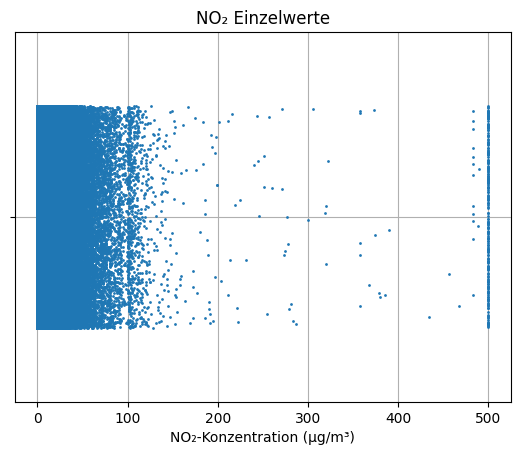

In [22]:
sns.stripplot(x=df["No2"], size=2, jitter=0.3)
plt.title("NO₂ Einzelwerte")
plt.xlabel("NO₂-Konzentration (µg/m³)")
plt.grid(True);

In [23]:
mean_no2 = df["No2"].mean()
median_no2 = df["No2"].median()
skew_no2 = skew(df["No2"].dropna())

print(f"Mittelwert (mean): {mean_no2:.2f}")
print(f"Median:            {median_no2:.2f}")
print(f"Schiefe:           {skew_no2:.2f}")

Mittelwert (mean): 9.76
Median:            7.50
Schiefe:           19.34


In [24]:
# NO2 >= 300 oder == 500
df.loc[df["No2"] >= 300, "No2"] = np.nan

### Bereinigung der NO₂-Werte
Die NO₂-Werte zeigen eine stark rechtsschiefe Verteilung, mit einem Mittelwert von 10.55 µg/m³, einem Median von 8.40 µg/m³ und einer Schiefe von 10.08. Die große Mehrheit der Messwerte liegt unterhalb von 120 µg/m³, während einzelne Ausreißer bis 425 µg/m³ reichen. 

Zusätzlich tritt eine auffällige Häufung bei 500 µg/m³ auf, was sehr wahrscheinlich auf technische Platzhalterwerte zurückzuführen ist.
Um die Analyse nicht durch extreme Einzelwerte zu verzerren, wurden alle NO₂-Werte ab 300 µg/m³ ausgeschlossen.

In [25]:
df["No2"].describe()

count   1,408,527.00
mean            9.67
std             8.29
min             0.00
25%             4.60
50%             7.50
75%            12.40
max           299.80
Name: No2, dtype: float64

## Schwefeldioxid (So2)

"Schwefeldioxid (SO2) ist ein farbloses, stechend riechendes, wasserlösliches Gas, das Mensch und Umwelt beeinträchtigt. In der Atmosphäre aus Schwefeldioxid entstehende Sulfatpartikel tragen zudem zur Belastung mit Feinstaub (PM10) bei." (https://www.umweltbundesamt.de/themen/luft/luftschadstoffe-im-ueberblick/schwefeldioxid)

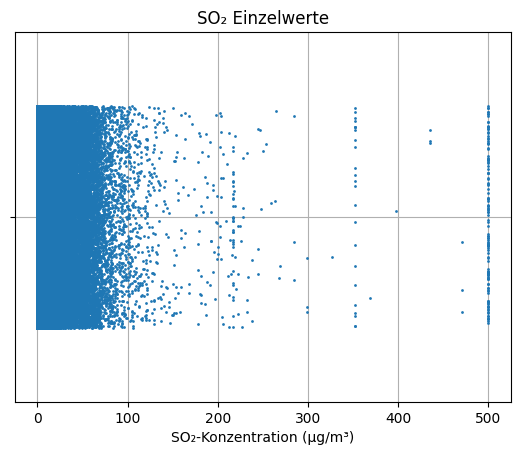

In [26]:
sns.stripplot(x=df["So2"], size=2, jitter=0.3)
plt.title("SO₂ Einzelwerte")
plt.xlabel("SO₂-Konzentration (µg/m³)")
plt.grid(True);

In [27]:
mean_so2 = df["So2"].mean()
median_so2 = df["So2"].median()
skew_so2 = skew(df["So2"].dropna())

print(f"Mittelwert (mean): {mean_so2:.2f}")
print(f"Median:            {median_so2:.2f}")
print(f"Schiefe:           {skew_so2:.2f}")

Mittelwert (mean): 3.98
Median:            2.50
Schiefe:           25.75


Es zeigt sich eine auffällige Punktelinie zwischen 300 und 400, die einen technischen Maximalwert bestimmter Messgeräte vermuten lässt. Wo genau liegt diese Linie?

In [28]:
df["So2"].value_counts().sort_index(ascending=False).head(10)

So2
500.00    125
470.90      3
435.20      3
397.50      1
368.80      1
352.20     24
326.80      1
299.00      3
285.00      3
269.10      1
Name: count, dtype: int64

In [29]:
# SO2 >= 352 oder == 500
df.loc[df["So2"] >= 352, "So2"] = np.nan

### Bereinigung der SO₂-Werte
Die Variable So2 misst die tägliche Schwefeldioxidkonzentration in µg/m³. Die Verteilung ist stark rechtsschief (Skewness = 25.75) mit einem Median von 2.5 µg/m³ und einem Mittelwert von 3.98 µg/m³.

Der Großteil der Werte liegt im Bereich von 0 bis 70 µg/m³, wobei sich oberhalb dieses Bereichs eine kontinuierlich abnehmende Streuung zeigt.

Ab etwa 220 µg/m³ tritt eine leichte Häufung auf, bei 352 µg/m³ eine weitere, und bei 500 µg/m³ zeigt sich eine deutliche Punktelinie – vermutlich ein technischer Maximalwert oder Platzhalter.

Zur Verbesserung der Datenqualität und Modellierbarkeit wurde ein Cutoff bei 352 µg/m³ gesetzt.
Alle Werte oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

## Analyse und Bereinigung der O3-Werte

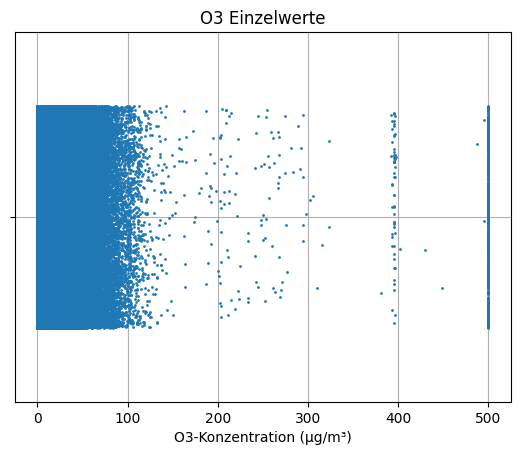

In [30]:
sns.stripplot(x=df["O3"], size=2, jitter=0.3)
plt.title("O3 Einzelwerte")
plt.xlabel("O3-Konzentration (µg/m³)")
plt.grid(True);

In [31]:
mean_o3 = df["O3"].mean()
median_o3 = df["O3"].median()
skew_o3 = skew(df["O3"].dropna())

print(f"Mittelwert (mean): {mean_o3:.2f}")
print(f"Median:            {median_o3:.2f}")
print(f"Schiefe:           {skew_o3:.2f}")

Mittelwert (mean): 20.46
Median:            19.90
Schiefe:           13.71


In [32]:
df["O3"].value_counts().sort_index(ascending=False).head(20)

O3
500.00    536
495.00      1
494.90      1
487.10      1
448.40      1
429.60      1
402.00      1
397.80      1
397.00      1
396.40      8
395.00     36
393.70      9
393.60      1
392.30      2
381.00      1
323.50      2
315.50      1
309.90      1
306.00      1
302.50      1
Name: count, dtype: int64

In [33]:
# O3 >= 323.5 oder == 500
df.loc[df["O3"] >= 323.5, "O3"] = np.nan

### Bereinigung der Ozon-Werte (O₃)
Die Ozonwerte (O3) zeigen eine stark rechtsschiefe Verteilung mit einer Skewness von 13.71. Der Median liegt bei 19.90 µg/m³, der Mittelwert bei 20.46 µg/m³ – was nahe beieinander liegt, aber durch einige hohe Ausreißer leicht verzerrt wird.

Im oberen Bereich der Verteilung ist eine ausgeprägte Punktelinie bei 395 µg/m³ erkennbar, mit 36 identischen Messwerten. Zudem zeigt sich eine große Häufung bei 500 µg/m³ mit 536 Einträgen – ein starkes Indiz für technische Grenzwerte oder Platzhalterwerte.

Zwischen 323.5 µg/m³ und 381 µg/m³ besteht eine auffällige Lücke, was darauf hinweist, dass oberhalb von 323.5 keine kontinuierliche natürliche Streuung mehr vorhanden ist.

→ Es wurde ein Cutoff bei 323.5 µg/m³ gesetzt.
Alle Werte oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

## Analyse und Bereinigung der Pm10-Werte

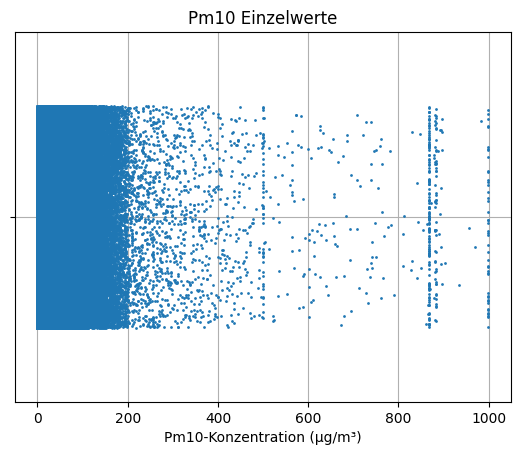

In [34]:
sns.stripplot(x=df["Pm10"], size=2, jitter=0.3)
plt.title("Pm10 Einzelwerte")
plt.xlabel("Pm10-Konzentration (µg/m³)")
plt.grid(True);

In [35]:
df["Pm10"].describe()

count   1,353,189.00
mean           27.07
std            27.69
min             0.00
25%            12.00
50%            19.00
75%            34.00
max           999.00
Name: Pm10, dtype: float64

In [36]:
mean_pm10 = df["Pm10"].mean()
median_pm10 = df["Pm10"].median()
skew_pm10 = skew(df["Pm10"].dropna())

print(f"Mittelwert (mean): {mean_pm10:.2f}")
print(f"Median:            {median_pm10:.2f}")
print(f"Schiefe:           {skew_pm10:.2f}")

Mittelwert (mean): 27.07
Median:            19.00
Schiefe:           9.64


In [37]:
# Wo beginnt die Häufung bei der breiten Linie im Ausreißerbereich (ca. 820-840)?

df["Pm10"].value_counts().loc[lambda x: x.index > 850].sort_index()


Pm10
855.00     1
861.00     1
863.00     1
865.00     1
866.00     1
867.00    59
868.00    72
869.00     1
872.00     1
878.00     1
879.00     2
880.00    20
882.00    24
884.00    13
887.00     1
890.00     1
892.00     1
893.00     1
895.00     4
896.00     4
903.00     1
935.00     1
956.00     1
970.00     1
983.00     1
999.00    45
Name: count, dtype: int64

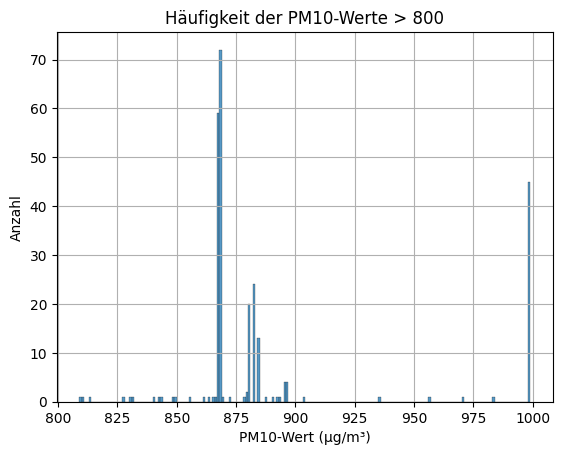

In [38]:
# "Datenmauer" plotten (nicht wirklich nötig, aber "Nice to have" für Leute, die gerne Visualisierungen mögen...)

high_values = df["Pm10"][df["Pm10"] > 800]
sns.histplot(high_values, binwidth=1)
plt.title("Häufigkeit der PM10-Werte > 800")
plt.xlabel("PM10-Wert (µg/m³)")
plt.ylabel("Anzahl")
plt.grid(True)
plt.show()


In [39]:
# PM10 >= 867
df.loc[df["Pm10"] >= 867, "Pm10"] = np.nan


### Bereinigung der PM10-Werte
Die PM10-Werte zeigen eine deutlich rechtsschiefe Verteilung mit einem Mittelwert von 32.43 µg/m³, einem Median von 24.00 µg/m³ und einer Schiefe von 7.17. Der größte Teil der Messwerte liegt unterhalb von 200 µg/m³, mit einer kontinuierlich abnehmenden Dichte bis in den Bereich von ca. 850 µg/m³.

Eine detaillierte Analyse der Einzelwertverteilung ergab jedoch eine auffällige Häufung von Messwerten im Bereich 867–882 µg/m³, insbesondere 40 Messungen mit dem identischen Wert 867. Diese systematische Häufung spricht stark für einen technisch bedingten Fehler oder künstlich begrenzte Wertebereiche. Zusätzlich tritt der Platzhalterwert 999 33 Mal auf.

Um die Analyse nicht durch diese systematischen Verzerrungen zu beeinflussen, wurden alle PM10-Werte ab 867 µg/m³ aus dem Datensatz ausgeschlossen.

### Vergleich Anzahl fehlender Werte vor und nach der Ausreißerentfernung (Schadstoffe)

In [40]:
missing_after = df.isna().sum()
outliers_removed = missing_after - missing_before

outlier_table = pd.DataFrame({
    "Missing Before": missing_before,
    "Missing After": missing_after,
    "Outliers Replaced": missing_after - missing_before
})
display(outlier_table)

,Missing Before,Missing After,Outliers Replaced
Year,0,0,0
Month,0,0,0
Day,0,0,0
Country,0,0,0
City,0,0,0
Latitude,2829,2829,0
Longitude,2829,2829,0
Co,631810,631968,158
No2,286260,286514,254
O3,374148,374751,603


In [41]:
# Wieviele Daten (%) wurden durch Ausreißerentfernung verloren?
missing_before_total = missing_before.sum()
missing_after_total = missing_after.sum()
outliers_total = missing_after_total - missing_before_total
outlier_percent = outliers_total / total_values_before * 100

print(f"Anzahl ersetzter Ausreißer: {outliers_total:,}")
print(f"Prozentualer Anteil der ersetzten Ausreißer: {outlier_percent:.4f}%")

Anzahl ersetzter Ausreißer: 1,526
Prozentualer Anteil der ersetzten Ausreißer: 0.0041%


Durch das Entfernen klar identifizierter Ausreißer **in den Schadstoffvariablen** wurden lediglich 0.0041 % der Datenpunkte ersetzt.
Der Datensatz wurde dadurch kaum reduziert, ist aber nun robuster gegenüber Verzerrungen, was insbesondere für Machine-Learning-Modelle, Visualisierungen und Clusteranalysen von Vorteil ist.

# Analyse und Bereinigung der Wettervariablen
Analog zum Vorgehen bei den Schadstoffen werden im Folgenden alle Wettervariablen untersucht und ggf. Platzhalterwerte und starke Ausreißer durch NaN ersetzt.

Anmerkung: Man KÖNNTE auch nur die Platzhalterwerte durch NaN ersetzten und die Ausreißer gesondert kennzeichen. Aber darauf wird jetzt erst einmal verzichtet.

Die Wettervariablen werden in einer Schleife am Stück abgehandelt. Da das Setzen der Grenzwerte und das Entfernen von Ausreißern für jede Variable individuell entscheiden werden sollte, um möglichst alle realistischen Werte zu erhalten, wir dieser Schritt nachgelagert.


In [42]:
# Save percentage of missing values before manipulatiing weather data
missing_before_weather = df.isna().sum()
total_values_before_weather = df.shape[0] * df.shape[1]


In [43]:
df[["Tavg", "Tmin", "Tmax", "Humidity", "Wspd", "Wdir", "Pres", "Prcp", "Dew"]].describe()


,Tavg,Tmin,Tmax,Humidity,Wspd,Wdir,Pres,Prcp,Dew
count,"1,400,959.00","1,376,504.00","1,374,164.00","1,306,961.00","1,239,023.00","1,169,606.00","1,202,982.00","1,038,543.00","1,000,165.00"
mean,15.38,10.82,20.38,68.66,11.34,183.52,"1,015.15",2.98,9.69
std,9.54,9.38,10.21,23.91,6.24,106.93,8.12,8.99,9.59
min,-41.00,-46.00,-37.20,"-2,671.10",0.00,0.00,925.20,0.00,-64.30
25%,8.70,4.30,13.10,58.30,7.00,86.00,"1,010.00",0.00,3.00
50%,15.90,11.00,21.10,72.80,10.00,194.00,"1,015.00",0.00,10.00
75%,22.70,17.70,28.30,83.00,14.20,274.00,"1,020.30",1.70,16.60
max,44.80,39.00,87.00,999.90,176.30,360.00,"1,392.10",462.00,32.00


## Auswertung von describe()

| Spalte | Bedingung für NaN                     | Begründung |
|:-------|:--------------------------------------|:-----------|
|Tavg    |                                       |                              |
|Tmin    |                                       |                          |
|Tmax	 |Tmax > 60	                             |gemessenes Maximum weit über weltweit beobachtete Temperaturen|
|Humidity|Humidity < 0 oder > 100                |physikalisch unmöglich / Platzhalter |
|Wspd	 |erst visuell prüfen, dann ggf. > 150   |Hurrikan-Grenze, höhere Werte für einzelen Böen möglich aber selten |
|Wdir    |<0 oder >360                           |Windrichtung wird in Winkelgrad gemessen |
|Pres	 |Pres > 1100	                         |Maximum ungewöhnlich hoch → Messfehler möglich |
|Prcp	 |                                       |plausible Naturverteilung, visuell prüfen
|Dew	 |ggf. ab –70 prüfen                     |tendenziell realistisch, vorsichtiger Umgang


# Schleife für Wettervariablen


📊 Analyse für: Tavg


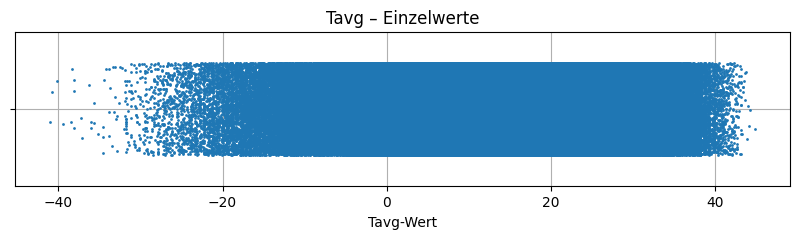

Mean:   15.38
Median: 15.90
Skew:   -0.38
Min:    -41.00
Max:    44.80
99.9%-Quantil (statistical suggestion only!): 38.30

📊 Analyse für: Tmin


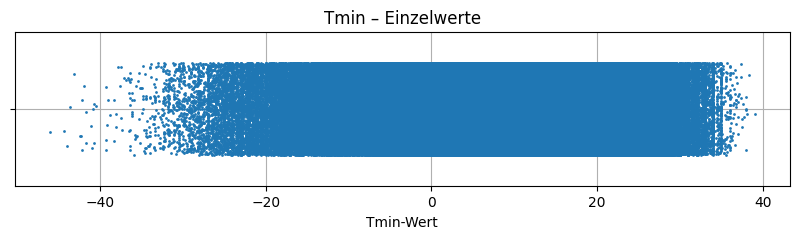

Mean:   10.82
Median: 11.00
Skew:   -0.32
Min:    -46.00
Max:    39.00
99.9%-Quantil (statistical suggestion only!): 32.40

📊 Analyse für: Tmax


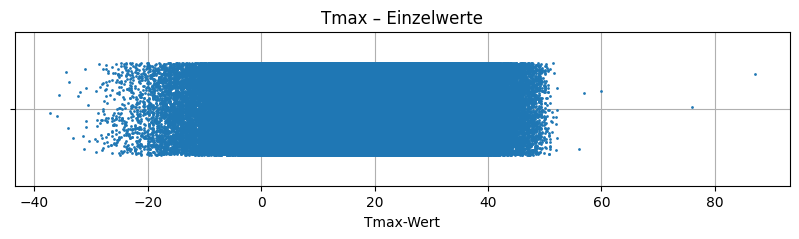

Mean:   20.38
Median: 21.10
Skew:   -0.37
Min:    -37.20
Max:    87.00
99.9%-Quantil (statistical suggestion only!): 45.90

📊 Analyse für: Humidity


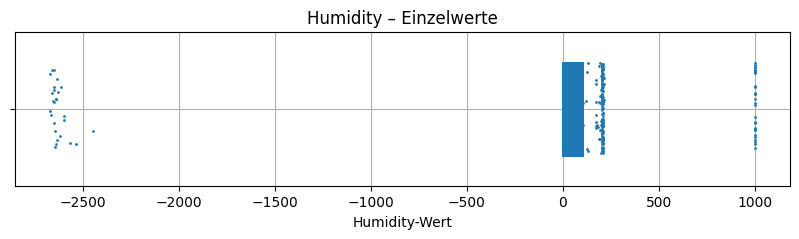

Mean:   68.66
Median: 72.80
Skew:   -27.84
Min:    -2671.10
Max:    999.90
99.9%-Quantil (statistical suggestion only!): 100.00

📊 Analyse für: Wspd


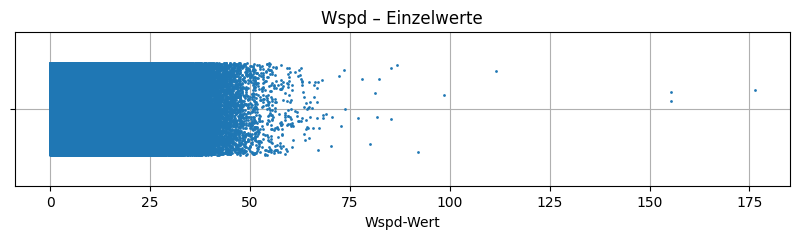

Mean:   11.34
Median: 10.00
Skew:   1.51
Min:    0.00
Max:    176.30
99.9%-Quantil (statistical suggestion only!): 44.70

📊 Analyse für: Wdir


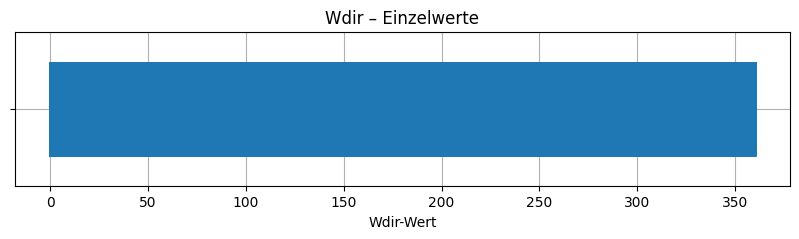

Mean:   183.52
Median: 194.00
Skew:   -0.11
Min:    0.00
Max:    360.00
99.9%-Quantil (statistical suggestion only!): 359.00

📊 Analyse für: Pres


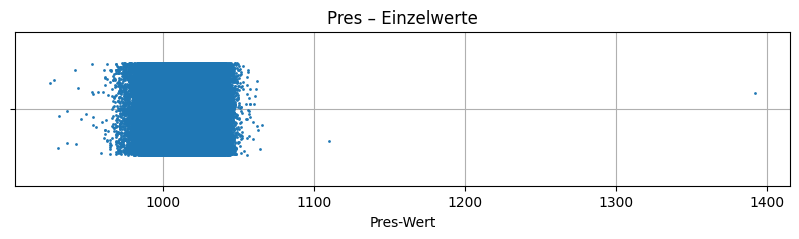

Mean:   1015.15
Median: 1015.00
Skew:   -0.04
Min:    925.20
Max:    1392.10
99.9%-Quantil (statistical suggestion only!): 1041.70

📊 Analyse für: Prcp


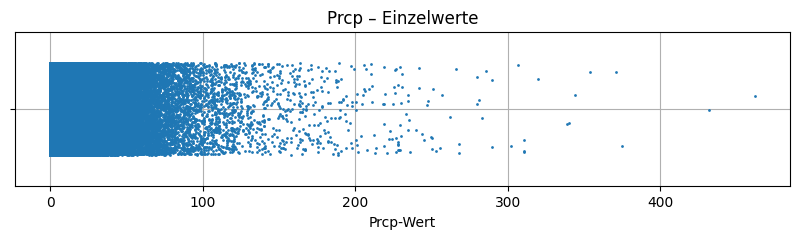

Mean:   2.98
Median: 0.00
Skew:   8.21
Min:    0.00
Max:    462.00
99.9%-Quantil (statistical suggestion only!): 101.10

📊 Analyse für: Dew


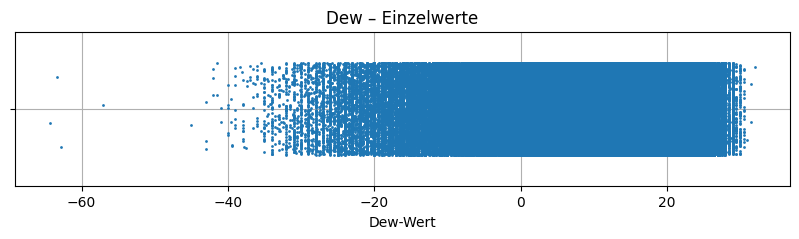

Mean:   9.69
Median: 10.00
Skew:   -0.37
Min:    -64.30
Max:    32.00
99.9%-Quantil (statistical suggestion only!): 28.00


In [44]:
weather_columns = ["Tavg", "Tmin", "Tmax", "Humidity", "Wspd", "Wdir", "Pres", "Prcp", "Dew"]

for col in weather_columns:
    print(f"\n📊 Analyse für: {col}")
    
    # Stripplot
    plt.figure(figsize=(10, 2))
    sns.stripplot(x=df[col], size=2, jitter=0.3)
    plt.title(f"{col} – Einzelwerte")
    plt.grid(True)
    plt.xlabel(f"{col}-Wert")
    plt.show()
    
    # Statistische Kennzahlen
    mean_val = df[col].mean()
    median_val = df[col].median()
    skew_val = df[col].skew()
    min_val = df[col].min()
    max_val = df[col].max()
    
    print(f"Mean:   {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Skew:   {skew_val:.2f}")
    print(f"Min:    {min_val:.2f}")
    print(f"Max:    {max_val:.2f}")
    
    # Cutoff-Vorschlag (nur zur Orientierung)
    cutoff = df[col].quantile(0.999)
    print(f"99.9%-Quantil (statistical suggestion only!): {cutoff:.2f}")


### Cutoffbestimmung und Ausreißerentfernung für Wettervariablen

Für Variablen, bei denen der Stripplot keine eindeutige Auskunft gibt, wird der Cutoff-Wert durch einen Blick auf die betreffenden Messwerte bestimmt:

In [45]:
# Cutoff für Tmax genauer bestimmen; oberste 10 Messwerte anschauen:
df["Tmax"].value_counts().sort_index(ascending=False).head(10)

# --> Cutoff bei 60 Grad

Tmax
87.00    1
76.00    1
60.00    1
57.00    1
56.00    1
52.20    1
52.10    2
52.00    3
51.70    1
51.50    2
Name: count, dtype: int64

In [46]:
# Wie entsteht der "gestrichelte" Eindruck im Stripplot für den Taupunkt? Gibt es mehrhheitlich ganzzahlige Messwerte?
df["Dew"].dropna().apply(lambda x: x.is_integer()).value_counts()

# --> Vermutlich geben die meisten Messgeräte nur ganzzahlige Werte aus

Dew
True     642772
False    357393
Name: count, dtype: int64

In [47]:
# Tmax: realistische Obergrenze bei 60°C
df.loc[df["Tmax"] > 60, "Tmax"] = np.nan

# Humidity: alles < 0 oder > 100 ist physikalisch nicht (bzw. über 100% nur SEHR kurzzeitig) möglich
df.loc[(df["Humidity"] < 0) | (df["Humidity"] > 100), "Humidity"] = np.nan

# Wspd: Werte > 150 km/h (Orkangrenze) sind extrem selten
df.loc[df["Wspd"] > 150, "Wspd"] = np.nan

# Pres: zwei Ausreißer über 1100 hPa, vermutlich technisches Problem
df.loc[df["Pres"] > 1100, "Pres"] = np.nan

# Prcp: 2 extreme Ausreißer, im Prinzip möglich, aber für Modelle ungünstig und für den Gesamtdatensatz nicht repräsentativ
df.loc[df["Prcp"] > 400, "Prcp"] = np.nan

# Dew: Werte von -40 bis 32 sind zu erwarten; mit diesen Schwellenwerten werden nur wenige Extremwerte entfernt
df.loc[(df["Dew"] < -40) | (df["Dew"] > 32), "Dew"] = np.nan

## Ausführliche Beschreibung der Wettervariablen

🌡️ Tavg – Durchschnittstemperatur

Die Variable Tavg beschreibt die durchschnittliche tägliche Temperatur. Die Verteilung ist leicht linksschief mit einem Skewness-Wert von –0.38. Der Mittelwert beträgt 15.38 °C, der Median liegt bei 15.90 °C, was auf eine weitgehend symmetrische Verteilung mit leichtem Übergewicht kälterer Temperaturen hinweist.

Ein Blick auf den Stripplot zeigt, dass sich alle Werte im realistisch meteorologischen Bereich befinden:

- Das Minimum liegt bei ca. –42 °C, was in sehr kalten Regionen (z. B. in Sibirien oder Teilen Kanadas) durchaus auftreten kann.
- Das Maximum liegt bei ca. 50 °C, was mit bekannten Hitzerekorden weltweit vereinbar ist.

Das 99.9%-Quantil liegt bei 38.30 °C. Dennoch wurde bewusst kein Grenzwert (Cutoff) gesetzt, da keine eindeutig unrealistischen Ausreißer erkennbar sind.

→ Es wurden keine Werte entfernt oder als Ausreißer markiert.

---

🌡️ Tmin – Tagestiefsttemperatur

Die Variable Tmin beschreibt die tägliche Tiefsttemperatur. Die Verteilung zeigt mit einer Schiefe von –0.32 eine leichte Linksschiefe, was auf ein geringfügiges Übergewicht sehr kalter Tage hinweist.
Der Mittelwert beträgt 10.82 °C, der Median 11.00 °C, was auf eine insgesamt symmetrische Verteilung ohne nennenswerte Verzerrungen schließen lässt.

Der Stripplot zeigt eine natürliche, kontinuierliche Verteilung der Messwerte.

- Das Minimum liegt bei –46 °C, was in kalten Klimazonen realistisch ist.
- Das Maximum bei 39 °C ist ungewöhnlich hoch für eine Tiefsttemperatur, aber unter besonderen Bedingungen (z. B. Hitzewellen) möglich.
- Das 99.9%-Quantil liegt bei 32.4 °C, wodurch nur sehr wenige extrem hohe Werte überhaupt betroffen wären.

Insgesamt zeigen sich keine auffälligen Ausreißer oder technische Artefakte.

→ Es wurden keine Werte entfernt oder ersetzt.

---

🌡️ Tmax – Tageshöchsttemperatur

Die Variable Tmax beschreibt die tägliche Höchsttemperatur.
Die Verteilung ist mit einem Skewness-Wert von –0.37 leicht linksschief.
Der Mittelwert beträgt 20.38 °C, der Median liegt bei 21.10 °C – die Verteilung ist insgesamt gut balanciert.

Der Stripplot zeigt einen realistischen Verlauf im Bereich zwischen ca. –37 °C und 50 °C, wobei sich oberhalb von 50 °C vereinzelte Werte häufen. Eine genauere Prüfung der 20 höchsten Werte ergab jedoch drei offensichtliche Ausreißer:
→ 60 °C, 76 °C und 87 °C – allesamt deutlich über bekannten meteorologischen Rekorden.

→ Als Grenzwert wurde daher ein Cutoff bei 60 °C gesetzt. Drei Werte oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

---

💧 Humidity – Relative Luftfeuchtigkeit

Die Variable Humidity beschreibt die relative Luftfeuchtigkeit in Prozent.
Die Verteilung ist extrem linksschief mit einer Skewness von –27.84, was auf starke Ausreißer im negativen und sehr hohen Bereich hindeutet.

Die realistischen Messwerte liegen zwischen 0 % und 100 %.
Der Stripplot zeigt jedoch vereinzelte, stark auffällige Werte:

- Das Minimum beträgt –2671.1 %, was physikalisch unmöglich ist
- Das Maximum liegt bei 999.9 %, höchstwahrscheinlich ein Platzhalterwert

→ Es wurde daher ein Grenzbereich von 0 % bis 100 % definiert.
Alle Werte außerhalb dieses Intervalls wurden durch NaN ersetzt.

---

💨 Wspd – Windgeschwindigkeit

Die Variable Wspd beschreibt die tägliche durchschnittliche Windgeschwindigkeit in km/h.
Die Verteilung zeigt eine leichte Rechtsschiefe mit einem Skewness-Wert von 1.51.
Der Mittelwert liegt bei 11.34 km/h, der Median bei 10.00 km/h, was auf einen leicht asymmetrischen, aber plausiblen Verlauf hindeutet.

Der Stripplot zeigt, dass die meisten Messwerte zwischen 0 und 45 km/h liegen, mit ausdünnender Streuung nach oben – was meteorologisch zu erwarten ist.
Drei auffällige Extremwerte oberhalb von 150 km/h wurden identifiziert, der Maximalwert liegt bei 176.3 km/h. Solche Werte sind theoretisch möglich (z. B. bei Orkanen), aber im Kontext dieser Analyse nicht repräsentativ.

→ Es wurde ein Cutoff bei 150 km/h gesetzt.
Drei Werte oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

---

🌬️ Pres – Luftdruck

Die Variable Pres beschreibt den täglichen Luftdruck in hPa. Die Verteilung ist mit einer Skewness von –0.04 nahezu symmetrisch, was auf eine ausgewogene, realistische Verteilung hinweist.
Der Mittelwert liegt bei 1015.15 hPa, was nahe am physikalischen Normaldruck (1013 hPa) liegt.

Ein Blick auf die Extremwerte zeigt:

- Minimum: 925.2 hPa – plausibel, z. B. bei Tiefdrucklagen
- Maximum: 1392.1 hPa – stark unrealistisch, deutlich über bekannten Rekorden

→ Es wurde ein Cutoff bei 1100 hPa gesetzt.
Zwei klare Ausreißer oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

---

🌧️ Prcp – Niederschlag

Die Variable Prcp beschreibt die tägliche Niederschlagsmenge in mm. Die Verteilung ist mit einer Skewness von 8.21 stark rechtsschief:

- An über der Hälfte aller Tage wurde kein Niederschlag gemessen (Median: 0.0 mm).
- Einzelne Starkregenereignisse führen zu hohen Maximalwerten (bis zu 462 mm), die jedoch extrem selten sind.

→ Zur Vermeidung einer übermäßigen Verzerrung der Analyse wurde ein Cutoff bei 400 mm gesetzt.
Zwei ungewöhnlich hohe Werte oberhalb dieses Grenzwerts wurden durch NaN ersetzt.

---

💧 Dew – Taupunkt

Die Variable Dew beschreibt den täglichen Taupunkt in °C – also die Temperatur, bei der die Luft mit Wasserdampf gesättigt ist.
Die Werte zeigen eine leicht linksschiefe Verteilung mit einer Skewness von –0.37.
Mittelwert und Median liegen nahe beieinander (9.69 °C bzw. 10.00 °C), was auf eine insgesamt ausgewogene Verteilung hindeutet.

Der Stripplot vermittelt einen „gestückelten“ Eindruck, da etwa zwei Drittel der Werte ganzzahlig sind – vermutlich durch vorverarbeitete oder gerundete Messdaten. Ein gutes Drittel liegt jedoch im nicht-ganzzahligen Bereich, was unterschiedliche Genauigkeitsstufen in den Datenquellen vermuten lässt.

Zur Erkennung potenzieller Ausreißer wurden die physikalisch plausiblen Grenzwerte des Taupunkts berücksichtigt:

- Oberhalb von 32 °C (tropisch-feucht) und
- Unterhalb von –40 °C (polar-trocken) sind reale Messwerte zwar nicht unmöglich, aber extrem selten.

→ Es wurde ein Cutoff bei –40 °C und +32 °C gesetzt. Werte außerhalb dieses Bereichs wurden durch NaN ersetzt.


### Vergleich Anzahl fehlender Werte vor und nach der Ausreißerentfernung (Wetter)

In [48]:
missing_after_weather = df.isna().sum()
outliers_weather = missing_after_weather - missing_before_weather

outlier_weather_table = pd.DataFrame({
    "Missing Before": missing_before_weather,
    "Missing After": missing_after_weather,
    "Outliers Replaced": outliers_weather
})

outlier_weather_table

,Missing Before,Missing After,Outliers Replaced
Year,0,0,0
Month,0,0,0
Day,0,0,0
Country,0,0,0
City,0,0,0
Latitude,2829,2829,0
Longitude,2829,2829,0
Co,631968,631968,0
No2,286514,286514,0
O3,374751,374751,0


In [49]:
missing_before_total_weather = missing_before_weather.sum()
missing_after_total_weather = missing_after_weather.sum()
outliers_total_weather = missing_after_total_weather - missing_before_total_weather
outlier_percent_weather = outliers_total_weather / total_values_before_weather * 100

print(f"Anzahl ersetzter Ausreißer (Wetterdaten): {outliers_total_weather:,}")
print(f"Prozentualer Anteil der ersetzten Ausreißer: {outlier_percent_weather:.4f}%")


Anzahl ersetzter Ausreißer (Wetterdaten): 358
Prozentualer Anteil der ersetzten Ausreißer: 0.0010%


Durch das Entfernen klar identifizierter Ausreißer **in den Wettervariablen** wurden lediglich 0.001 % der Datenpunkte ersetzt.
Der Datensatz wurde dadurch kaum reduziert, ist aber nun robuster gegenüber Verzerrungen, was insbesondere für Machine-Learning-Modelle, Visualisierungen und Clusteranalysen von Vorteil ist.

In [50]:
df.to_csv("data/cleaned_air_quality_data_2025_03_25.csv", index=False)

# Welche Features könnten zusammenhängen (Kollinearität)?

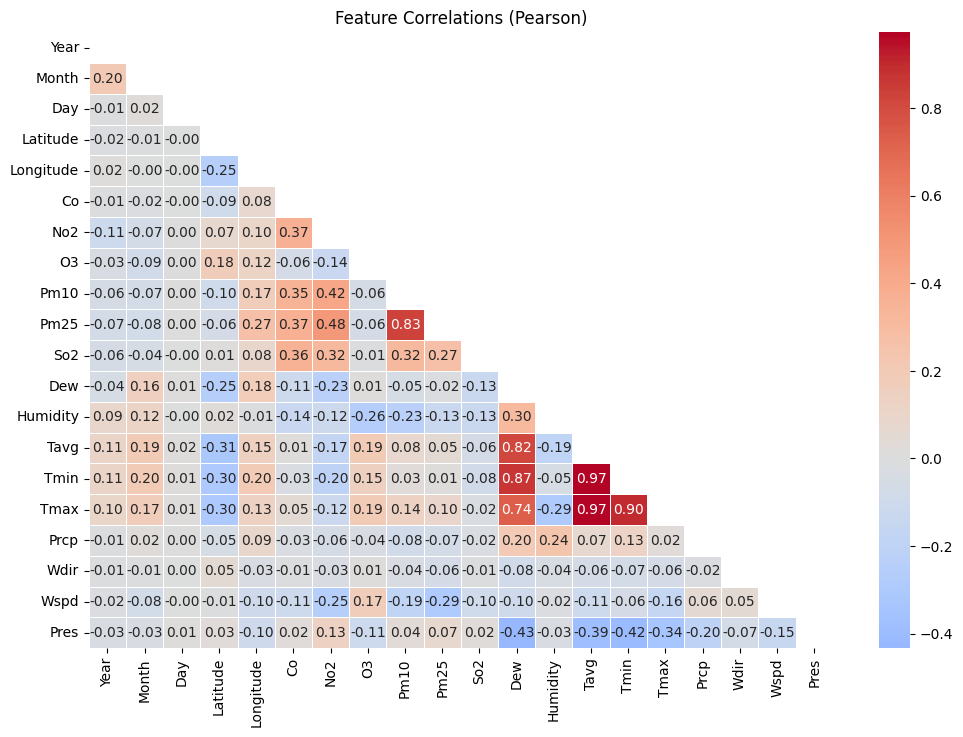

In [51]:
# Collinearity of features? (heatmap)

# > 0.8 = strong correlation
# 0.5 - 0.8 = moderate correlation
# < 0.5 = weak correlation

# calculate correlation matrix (Pearson)
corr_matrix = df.select_dtypes(include=['number']).corr()

# Mask upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Display heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlations (Pearson)");


In [52]:
# Show only strong and moderate correlations (>|0.4|); leave out main diagonal (1.0)

# Calculte matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# extract only strong and moderate correlations (>|0.4|); leave out main diagonal (1.0)
strong_corrs = corr_matrix[(corr_matrix.abs() > 0.4) & (corr_matrix.abs() < 1.0)]

# Convert df to long list (.stack) and reset index
strong_corrs = strong_corrs.stack().reset_index()
strong_corrs.columns = ["Feature 1", "Feature 2", "Korrelation"]

# remove redundant rows (note: the "<"-sign here refers to alphabetic order of feature names, not to numbers of any kind!)
strong_corrs = strong_corrs.loc[strong_corrs["Feature 1"] < strong_corrs["Feature 2"]]

strong_corrs

,Feature 1,Feature 2,Korrelation
0,No2,Pm10,0.42
1,No2,Pm25,0.48
3,Pm10,Pm25,0.83
6,Dew,Tavg,0.82
7,Dew,Tmin,0.87
8,Dew,Tmax,0.74
9,Dew,Pres,-0.43
11,Tavg,Tmin,0.97
12,Tavg,Tmax,0.97
19,Tmax,Tmin,0.90


## Analyse der Korrelationen (Pearson) und Vorschläge für weitere Analysen

Die Korrelationsmatrix zeigt mehrere starke und inhaltlich gut erklärbare Zusammenhänge zwischen den numerischen Variablen. Besonders deutlich sind folgende Muster:

**Feinstaub- und Stickstoffdioxidwerte hängen zusammen:**
Es besteht eine starke Korrelation zwischen PM10 und PM2.5 (r = 0.83), was plausibel ist, da PM2.5 eine Teilmenge von PM10 ist. Zusätzlich korreliert NO₂ moderat mit beiden Feinstaubkomponenten (r ≈ 0.42–0.48), was auf gemeinsame Emissionsquellen wie Verkehr oder Industrie hindeutet.

**Temperaturvariablen sind stark untereinander korreliert:**
Die Tagesmitteltemperatur (Tavg) steht in sehr engem Zusammenhang mit Tmin und Tmax (r ≈ 0.97). Auch Tmin und Tmax selbst sind hoch korreliert (r = 0.90). Das ist mathematisch und physikalisch naheliegend und spricht dafür, nicht alle drei Variablen gleichzeitig zu verwenden, um Redundanz zu vermeiden.

**Der Taupunkt (Dew) korreliert stark mit Temperatur:**
Die stärkste Korrelation liegt zwischen Dew und Tmin (r = 0.87), gefolgt von Tavg (r = 0.82). Dies spiegelt wider, dass die Luftfeuchtigkeit – und damit der Taupunkt – eng mit der Umgebungstemperatur zusammenhängt.

**Einige schwächer negative Korrelationen deuten auf atmosphärische Zusammenhänge hin:**
Der Luftdruck (Pres) korreliert moderat negativ mit Dew (r = –0.43) und Tmin (r = –0.42), was mit typischen meteorologischen Prozessen in Zusammenhang stehen kann (z. B. feuchtwarme Luft in Tiefdruckgebieten).

### **Nutzen der Korrelationsanalyse, bzw. Weiterverwendung der Ergebnisse**

Diese Ergebnisse helfen dabei, hoch korrelierte bzw. redundante Variablen zu erkennen und gezielt für weitere Analysen (z. B. Clusteranalyse oder Modellierung) geeignete Features auszuwählen.

Für viele Verfahren, wie z. B. Clustering oder Regressionsmodelle, ist es ratsam, von stark korrelierten Variablen jeweils nur eine zu verwenden, um Verzerrungen oder sogenannte Multikollinearität zu vermeiden.

Alternativ können Hauptkomponentenanalyse (PCA) oder andere dimensionalitätsreduzierende Verfahren genutzt werden, um mehrere stark korrelierte Variablen zu einer gemeinsamen Komponente zusammenzufassen, ohne wesentliche Information zu verlieren.


In [53]:
df.index

RangeIndex(start=0, stop=1695041, step=1)

# Pairplot der wichtigsten Features

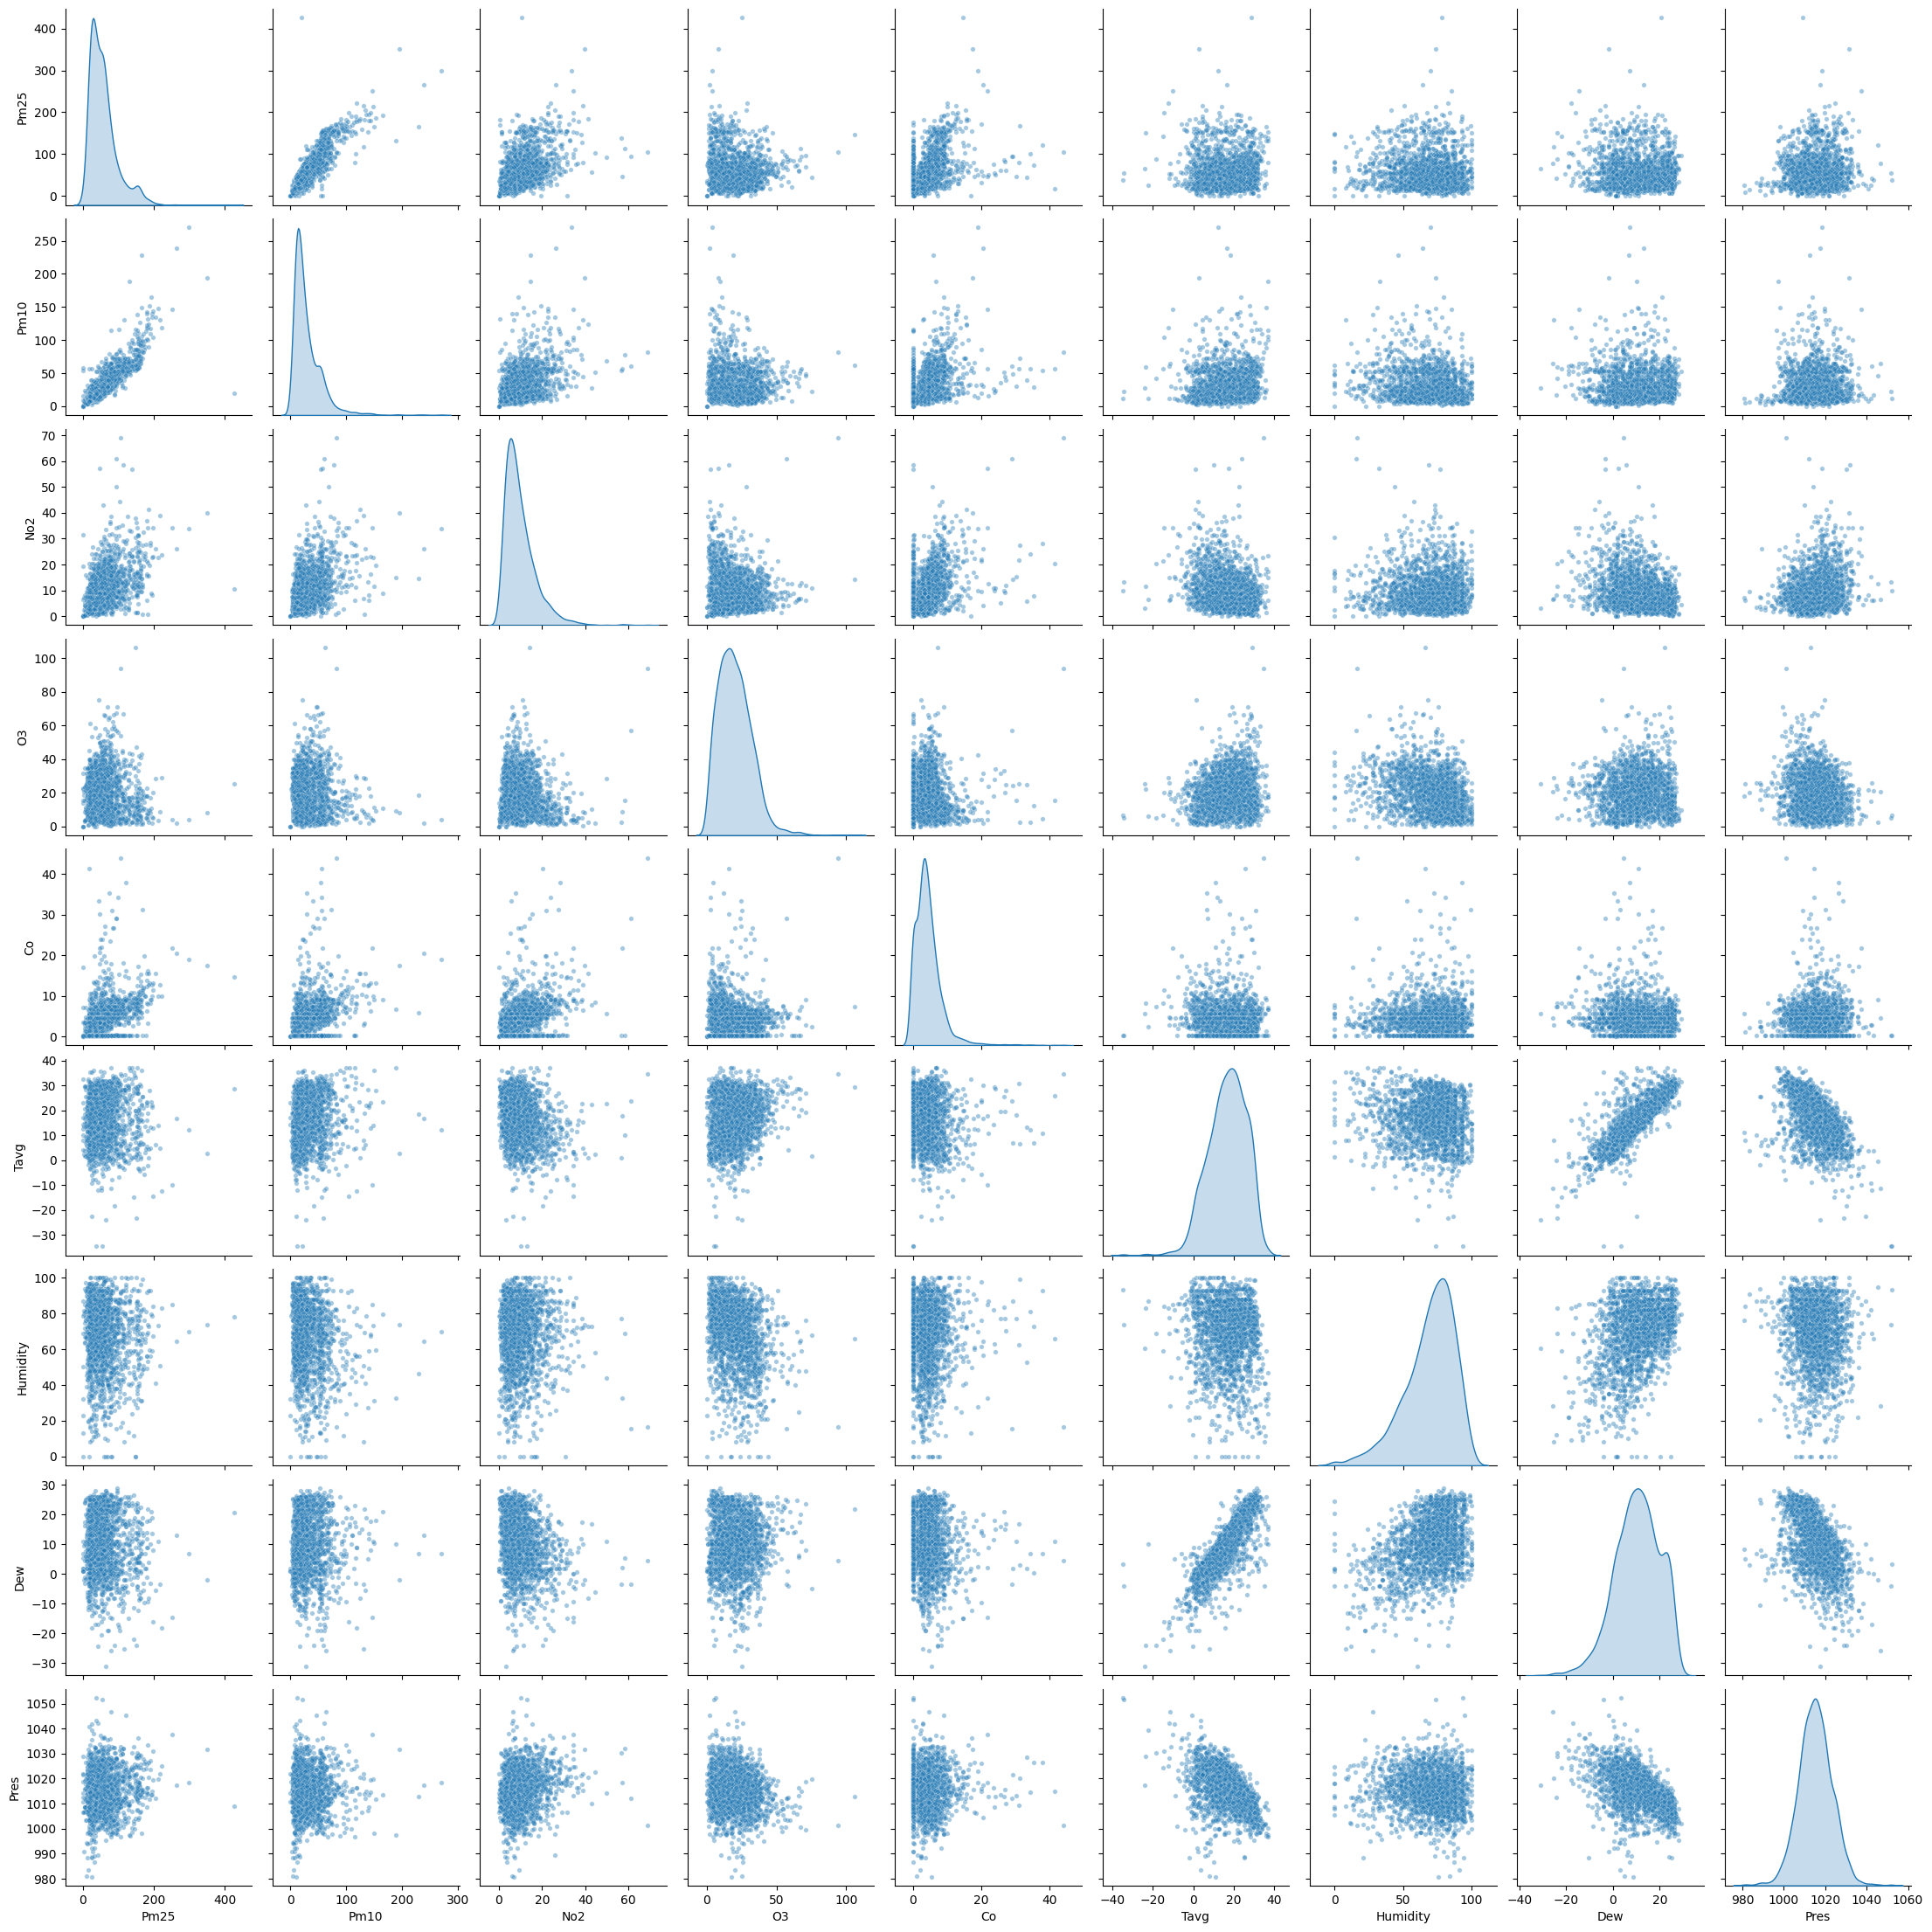

In [54]:
features = ["Pm25", "Pm10", "No2", "O3", "Co", "Tavg", "Humidity", "Dew", "Pres"]
sample_df = df[features].dropna().sample(n=2000, random_state=42)
sns.pairplot(sample_df, diag_kind="kde", plot_kws={"alpha": 0.4, "s": 15})

Die Histogramme im Pairplot bestätigen die zuvor berechnete Schiefe vieler Variablen:

Schadstoffe wie Pm25, NO2 und O3 sind erwartungsgemäß rechtsschief verteilt, während Temperatur (Tavg), Luftfeuchtigkeit (Humidity) und Taupunkt (Dew) eine leichte Linksschiefe zeigen. Der Luftdruck (Pres) hebt sich positiv ab durch seine nahezu normalverteilte Form, was eine gute Ausgangsbasis für statistische Modellierung bietet.



# Test mit Regressionsplots und LOWESS um Muster zu identifizieren

Wir nutzen Samples von 2000-3000 Datenpunkten. Und zur Replizierbarkeit legen wir einen Random State von 42 fest.
Und damit Seaborn gut arbeiten kann, entfernen wir alle NaN-Werte

## Zusammenhang zwischen NO2 und PM25

Pearson-Koeffizient: 0,48 --> schwach, aber vorhanden.

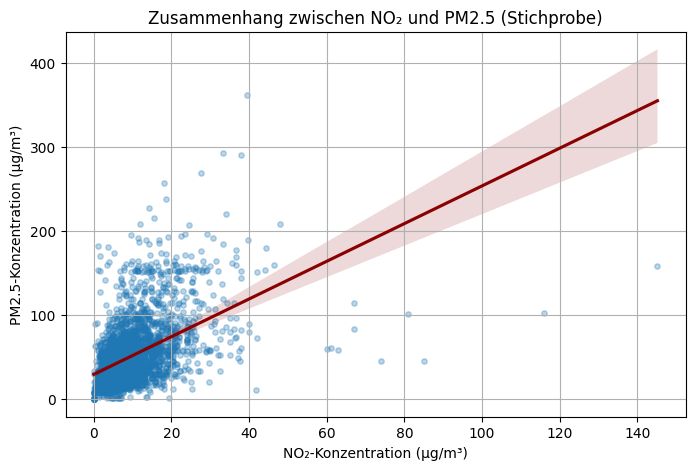

In [55]:
sample_df = df[["No2", "Pm25"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=sample_df, x="No2", y="Pm25",
            scatter_kws={"alpha":0.3, "s":15},
            line_kws={"color": "darkred"})

plt.title("Zusammenhang zwischen NO₂ und PM2.5 (Stichprobe)")
plt.xlabel("NO₂-Konzentration (µg/m³)")
plt.ylabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True)

Der regplot zwischen NO₂ und PM2.5 zeigt eine positive lineare Tendenz, was plausibel erscheint, da beide Schadstoffe häufig durch Verkehr oder industrielle Prozesse freigesetzt werden.
Aufgrund der breiten Streuung und fehlender Kontextvariablen ist die Regressionslinie jedoch nicht als kausales Modell, sondern lediglich als explorative Visualisierung einer Korrelation zu verstehen.
Der Konfidenzbereich ist nur für den Bereich gut, in dem die meisten Messwerte liegen. Problem: Heteroskadastizität.

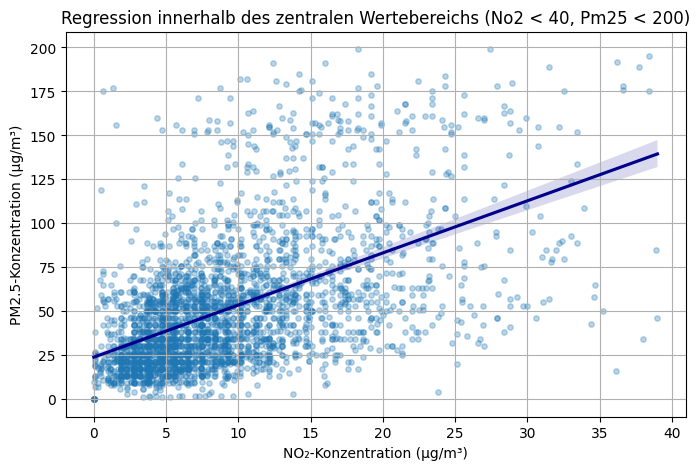

In [56]:
subset = df[(df["No2"] < 40) & (df["Pm25"] < 200)][["No2", "Pm25"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="No2", y="Pm25",
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "darkblue"})

plt.title("Regression innerhalb des zentralen Wertebereichs (No2 < 40, Pm25 < 200)")
plt.xlabel("NO₂-Konzentration (µg/m³)")
plt.ylabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True);

Nimmt man nur den zentralen Wertebereich heraus, ist iene lineare Verteilung sichtbar, und auch das Konfidenzintervall ist "akzeptabel".

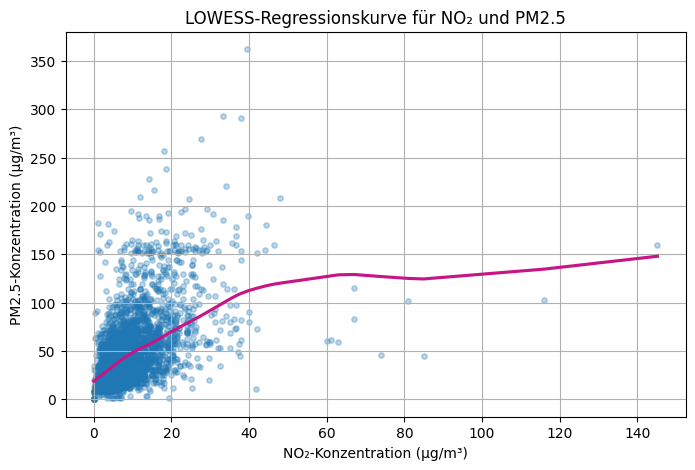

In [57]:
subset = df[["No2", "Pm25"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="No2", y="Pm25", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "mediumvioletred"})

plt.title("LOWESS-Regressionskurve für NO₂ und PM2.5")
plt.xlabel("NO₂-Konzentration (µg/m³)")
plt.ylabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True)

Die Anwendung von LOWESS auf den gesamten Wertebereich von NO₂ und PM2.5 zeigt, dass der Zusammenhang nicht durchgängig linear ist.
Besonders im oberen Wertebereich (ab ~70 µg/m³ NO₂) ist die Punktverteilung zu dünn und uneinheitlich, was zu starken Schwankungen in der Regressionskurve führt.
Im zentralen Wertebereich (NO₂ < 40, PM2.5 < 200) zeigt sich hingegen ein stabiler, positiver Trend.
Für lineare Analysen ist daher eine Einschränkung auf diesen Bereich sinnvoll.

## Zusammenhang zwischen Ozonwert (O3) und Durchnittstemperatur (Tavg)

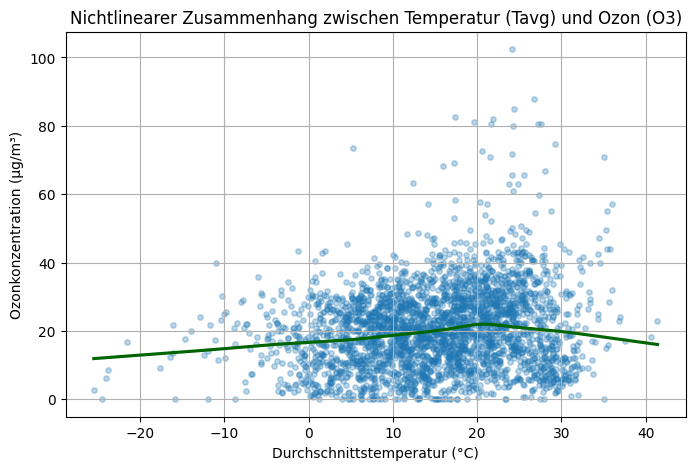

In [58]:
subset = df[["O3", "Tavg"]].dropna().sample(n=3000, random_state=42)
plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Tavg", y="O3", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "darkgreen"})

plt.title("Nichtlinearer Zusammenhang zwischen Temperatur (Tavg) und Ozon (O3)")
plt.xlabel("Durchschnittstemperatur (°C)")
plt.ylabel("Ozonkonzentration (µg/m³)")
plt.grid(True);

Die Analyse des Zusammenhangs zwischen Temperatur (Tavg) und Ozonkonzentration (O3) mit Hilfe einer LOWESS-Regression zeigt einen klar nichtlinearen Verlauf:

- Bei Temperaturen zwischen 0 und etwa 20 °C steigt die Ozonkonzentration tendenziell an – ein plausibler Effekt durch sonnengetriebene Bildung.
- Ab ca. 20 °C sinkt die Konzentration jedoch wieder.

Dieser geknickte Verlauf weist darauf hin, dass eine lineare Regressionsanalyse hier nicht geeignet ist, um den Zusammenhang korrekt zu modellieren.

--> Stichwort: „Ozon-Peak-Temperatur-Phänomen“

## Zusammenhang zwischen Luftfeuchtigkeit (Humidity) und mittelgroßen Feinstaubpartikeln (Pm25)

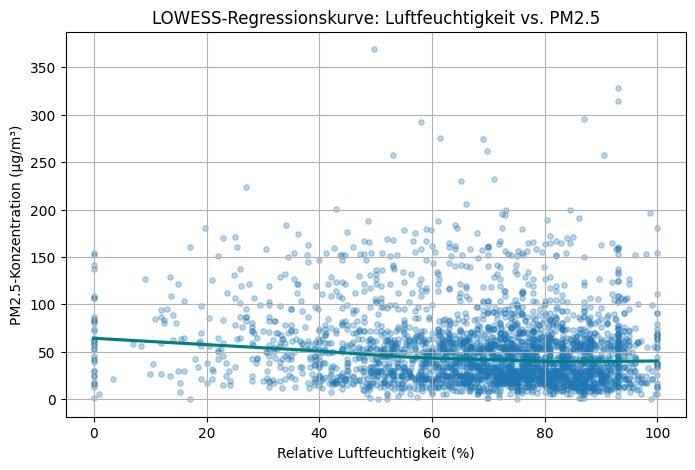

In [59]:
subset = df[["Humidity", "Pm25"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Humidity", y="Pm25", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "teal"})

plt.title("LOWESS-Regressionskurve: Luftfeuchtigkeit vs. PM2.5")
plt.xlabel("Relative Luftfeuchtigkeit (%)")
plt.ylabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True);

Die LOWESS-Regression zwischen Luftfeuchtigkeit (Humidity) und PM2.5 zeigt einen klar negativen Zusammenhang.
Bei niedriger Luftfeuchtigkeit (unter 20 %) liegen die PM2.5-Werte durchschnittlich bei etwa 70 µg/m³, während sie bei sehr hoher Luftfeuchtigkeit (über 90 %) auf unter 50 µg/m³ sinken.

Dieser Verlauf ist nicht ganz linear, sondern flacht bei zunehmender Feuchtigkeit ab – ein Hinweis auf sättigende Effekte oder natürliche Begrenzungen.

Eine lineare Regression wäre hier möglich, aber nicht unbedingt angemessen – LOWESS zeigt die tatsächliche Struktur des Zusammenhangs besser.

## Zusammenhang zwischen NO2 und PM10

Sollte ähnlich sein wie der zwischen No2 und PM25, aber um abzuschätzen, ob für spätere Analysen ein Feature redundant ist, gehen wir mit LOWESS sicher:

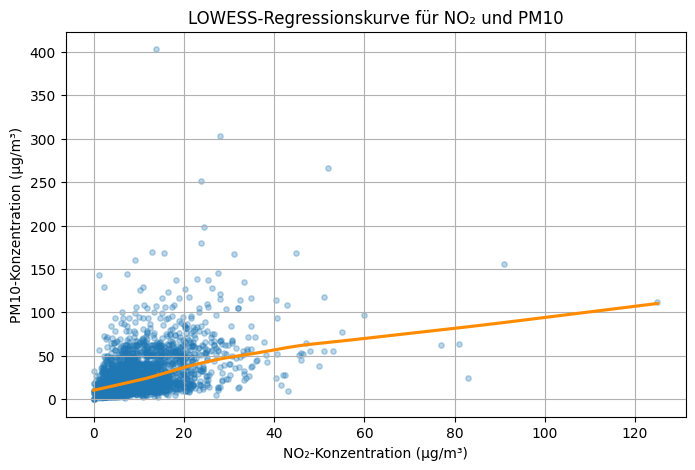

In [60]:
subset = df[["No2", "Pm10"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="No2", y="Pm10", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "darkorange"})

plt.title("LOWESS-Regressionskurve für NO₂ und PM10")
plt.xlabel("NO₂-Konzentration (µg/m³)")
plt.ylabel("PM10-Konzentration (µg/m³)")
plt.grid(True);

Die LOWESS-Analyse des Zusammenhangs zwischen NO₂ und PM10 zeigt einen insgesamt positiven Trend, der im Bereich bis etwa 40 µg/m³ NO₂ weitgehend linear verläuft. Ab etwa 40 µg/m³ NO₂ wird der Zusammenhang flacher, was auf eine Sättigung oder zunehmende Streuung hinweisen könnte. In diesem Bereich sind jedoch nur wenige Datenpunkte vorhanden, sodass der Verlauf der Kurve dort nicht belastbar interpretiert werden sollte.

Eine lineare Regression könnte im unteren Bereich sinnvoll sein, sollte aber auf den zentralen Wertebereich beschränkt werden.

--> Der Zusammenhang ist ähnlich wie der zwischen NO₂ und PM25.

## Zusammenhang zwischen Pm10 und Pm25

Pm25 ist eine Teilmenge von Pm10. Sind beide Features relevant für spätere Modellierungen oder ist eines davon redundant?


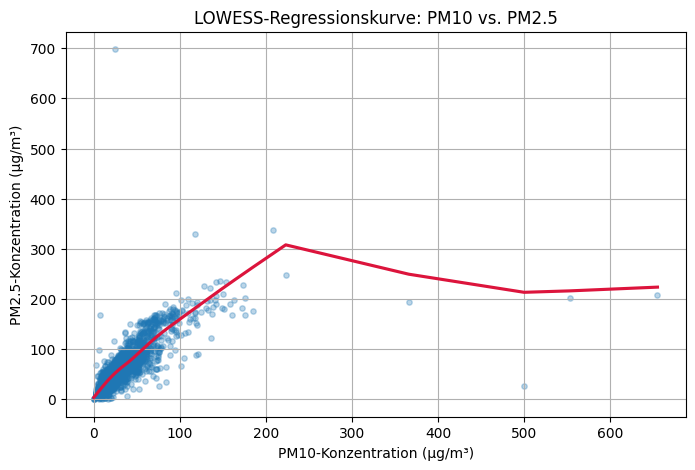

In [61]:
subset = df[["Pm10", "Pm25"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Pm10", y="Pm25", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "crimson"})

plt.title("LOWESS-Regressionskurve: PM10 vs. PM2.5")
plt.xlabel("PM10-Konzentration (µg/m³)")
plt.ylabel("PM2.5-Konzentration (µg/m³)")
plt.grid(True);


Die LOWESS-Analyse bestätigt den erwarteten sehr starken linearen Zusammenhang zwischen PM10 und PM2.5.

Im zentralen Bereich steigt PM2.5 nahezu proportional zu PM10, mit nur einer leichten Abflachung bei höheren PM10-Werten.
Diese minimale Abweichung könnte darauf hindeuten, dass bei sehr hoher Feinstaubbelastung der relative Anteil von groben Partikeln (PM10 ohne PM2.5) etwas zunimmt.

Aufgrund der wenigen Datenpunkte in den extremen Bereichen kann für diesen keine Belastbare Aussage gemacht werden.

## Zusammenhang zwischen Taupunkt (Dew) und Tagestiefsttemperatur (Tmin)

Pearson-Koeffizient: 0.87

Die Temperatur beeinflusst den Taupunkt. Der Taupunkt ist der Punkt, bei dem die Luft gesättigt ist und Wasserdampf kondensiert. Er ist immer kleiner oder gleich der aktuellen Lufttemperatur. Er nähert sich der Lufttemperatur vor allem nachts, wenn es abkühlt → deswegen ist der Zusammenhang mit Tmin am stärksten.

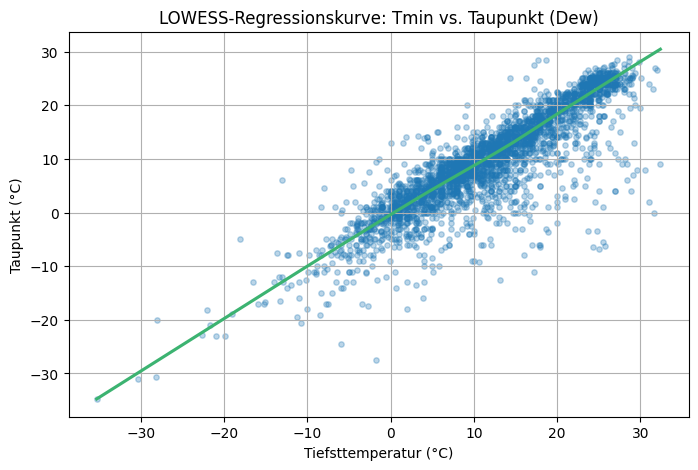

In [62]:
subset = df[["Tmin", "Dew"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Tmin", y="Dew", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "mediumseagreen"})

plt.title("LOWESS-Regressionskurve: Tmin vs. Taupunkt (Dew)")
plt.xlabel("Tiefsttemperatur (°C)")
plt.ylabel("Taupunkt (°C)")
plt.grid(True);

Es zeigt sich ein deutlicher linearer Zusammenhang ohne nennenswerte Knicke.

Vergleich von LOWESS und linearer Regressionlinie:

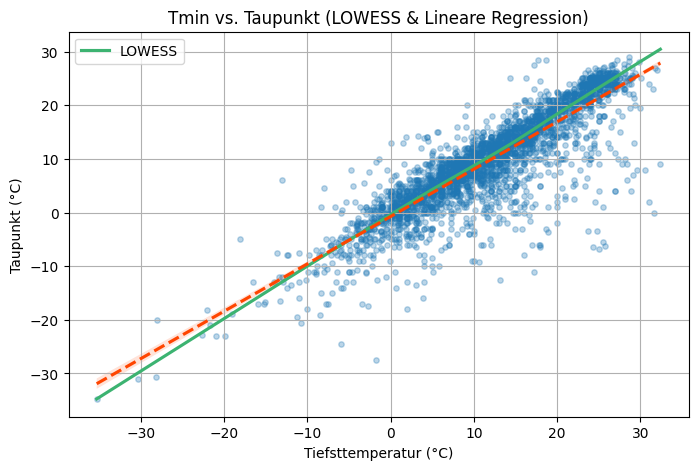

In [63]:
subset = df[["Tmin", "Dew"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))

# LOWESS
sns.regplot(data=subset, x="Tmin", y="Dew", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "mediumseagreen", "label": "LOWESS"})

# Lineare Regression
sns.regplot(data=subset, x="Tmin", y="Dew", lowess=False,
            scatter=False,
            line_kws={"color": "orangered", "linestyle": "--", "label": "Linear"})

plt.title("Tmin vs. Taupunkt (LOWESS & Lineare Regression)")
plt.xlabel("Tiefsttemperatur (°C)")
plt.ylabel("Taupunkt (°C)")
plt.legend()
plt.grid(True);


Tiefsttemperatur (Tmin) und Taupunkt (Dew) sind hoch korreliert (r = 0.87).

Ein LOWESS-Plot offenbart einen weitgehend linearen Anstieg des Taupunkts mit zunehmender Temperatur, insbesondere im Bereich unter 0 °C. In höheren Temperaturbereichen wird die Steigung etwas flacher, was auf eine schwächer werdende Kopplung hinweisen könnte.

Zum Vergleich wurde zusätzlich eine lineare Regressionslinie mit Konfidenzintervall geplottet. Sie verläuft insgesamt flacher als die LOWESS-Kurve. Das Konfidenzband ist sehr schmal, was auf eine geringe Streuung und hohe Vorhersagbarkeit hinweist.

Der Vergleich zeigt, dass eine lineare Regression im zentralen Bereich zwar möglich, aber nicht ideal ist.
LOWESS eignet sich, um die **leichte** Nichtlinearität sichtbar zu machen und kann für explorative Zwecke empfohlen werden.

## Zusammenhang zwischen Taupunkt (dew) und Luftdruck (Pres)

Korrelationskoeffizient: -0,43



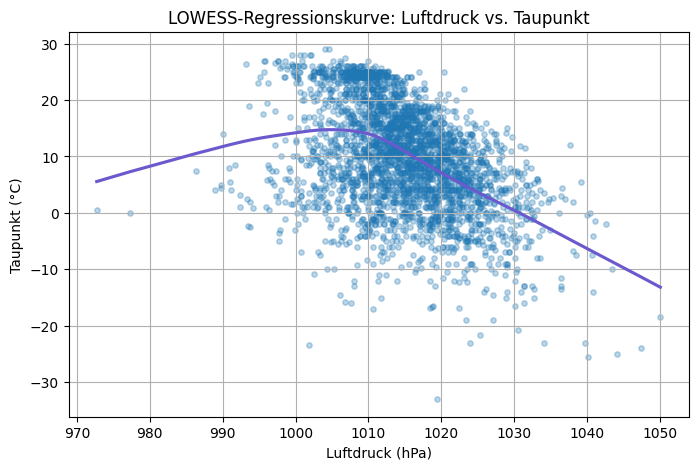

In [64]:
subset = df[["Pres", "Dew"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Pres", y="Dew", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "slateblue"})

plt.title("LOWESS-Regressionskurve: Luftdruck vs. Taupunkt")
plt.xlabel("Luftdruck (hPa)")
plt.ylabel("Taupunkt (°C)")
plt.grid(True)

Die LOWESS-Analyse zwischen Luftdruck (Pres) und Taupunkt (Dew) zeigt einen nichtlinearen, umgekehrt U-förmigen Zusammenhang.
Bei niedrigen Druckwerten steigt der Taupunkt zunächst an, flacht im mittleren Bereich ab und fällt schließlich bei hohem Druck steil ab.
Dies unterstützt die meteorologische Annahme, dass Tiefdruck mit feuchterer Luft (höherem Taupunkt) und Hochdruck mit trockenerer Luft (niedrigerem Taupunkt) einhergeht.

## Zusammenhang zwischen Luftdruck (Pres) und Tagestiefsttemperatur (Tmin)

Korrelationskoeffizient: -0,42

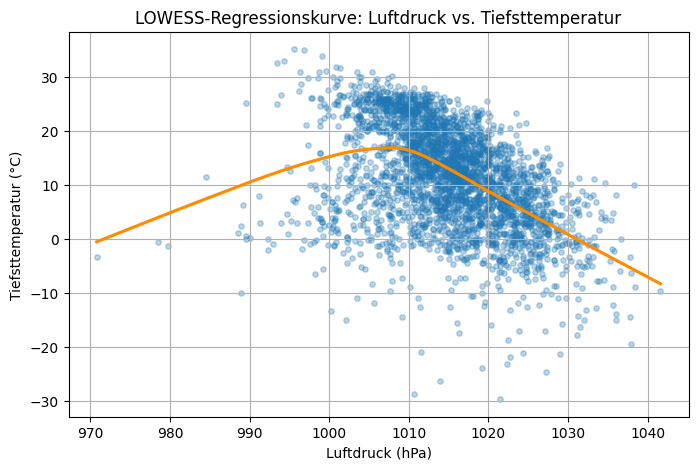

In [65]:
subset = df[["Pres", "Tmin"]].dropna().sample(n=3000, random_state=42)

plt.figure(figsize=(8, 5))
sns.regplot(data=subset, x="Pres", y="Tmin", lowess=True,
            scatter_kws={"alpha": 0.3, "s": 15},
            line_kws={"color": "darkorange"})

plt.title("LOWESS-Regressionskurve: Luftdruck vs. Tiefsttemperatur")
plt.xlabel("Luftdruck (hPa)")
plt.ylabel("Tiefsttemperatur (°C)")
plt.grid(True)

Die LOWESS-Analyse zwischen Luftdruck (Pres) und Tiefsttemperatur (Tmin) zeigt einen symmetrisch gebogenen Zusammenhang, ähnlich wie bei Pres und Dew.

- In Bereichen mit niedrigem Druck steigen die nächtlichen Tiefsttemperaturen zunächst leicht an, was auf eine isolierende Wirkung von Wolken und Wetteraktivität bei Tiefdruck hindeutet.
- Ab einem Druck von etwa 1008 hPa kehrt sich der Effekt um: Bei hohem Druck sinken die Tiefsttemperaturen, vermutlich durch klare Nächte mit stärkerer Abkühlung.

Die Kurve ist harmonisch geformt und belegt eine meteorologisch plausible, nichtlineare Beziehung.

# Abschließende Bewertung der Korrelationen und der Datenstruktur

Die ausführliche Analyse der Korrelationen – unterstützt durch klassische Korrelationsmatrizen, Regressionsplots und LOWESS-Kurven – hat gezeigt, dass die betrachteten Variablen sinnvolle, teils lineare, teils nichtlineare Zusammenhänge aufweisen, die physikalisch, meteorologisch oder umweltbezogen plausibel erklärbar sind.

Dabei konnten sowohl bekannte Beziehungen (z. B. zwischen Feinstaub und Stickstoffdioxid oder zwischen Taupunkt und Temperatur) als auch weniger offensichtliche, aber nachvollziehbare Muster (z. B. der Einfluss des Luftdrucks auf Temperatur und Feuchtigkeit) sichtbar gemacht werden.

Insgesamt deutet die Korrelationenanalyse darauf hin, dass es sich um natürliche, glaubwürdige und konsistente Umweltdaten handelt, die keine Anzeichen künstlicher Verzerrung oder unplausibler Artefakte zeigen.

Damit ist der Datensatz in seiner bereinigten Form eine solide Grundlage für weiterführende Machine-Learning-Modelle. Die erkannten Strukturen können gezielt genutzt werden, um sinnvolle Features zu definieren, Zusammenhänge zu explorieren und vorhersagende Modelle zu entwickeln, die auf realweltlichen Mustern basieren.